# UPPER CONFIDENCE BOUND (UCB)

Deterministic algorithm

IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

IMPORTING DATASET

In [2]:
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")


IMPLEMENTING UCB

In [24]:
import math
N=10000
d=10
ads_selected=[]
number_of_selection=[0]*d 
sums_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if (number_of_selection[i]>0):
            average_reward=sums_of_rewards[i]/number_of_selection[i]
            delta_i=math.sqrt(3/2 * math.log(n+1)/number_of_selection[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if (upper_bound>max_upper_bound):
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    number_of_selection[ad]=number_of_selection[ad]+1
    reward=dataset.values[n,ad]
    sums_of_rewards[ad]=sums_of_rewards[ad]+reward
    total_reward=total_reward+reward


VISUALISING THE RESULTS

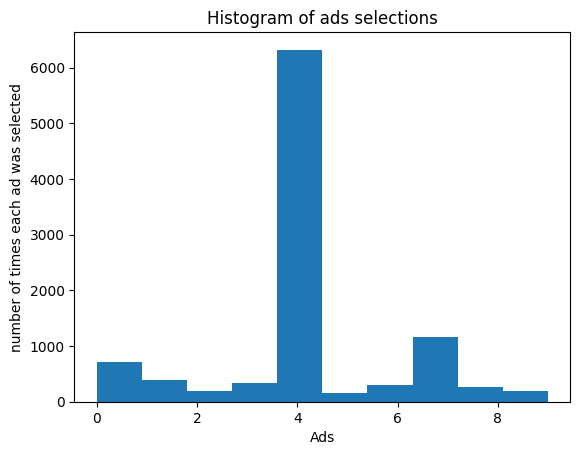

In [17]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('number of times each ad was selected')
plt.show()